<a href="https://colab.research.google.com/github/phytometrics/plant_phenotyping_python/blob/dev/notbooks/plant_catologing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ドローン画像からのテンサイの個体認識
<img src="https://oup.silverchair-cdn.com/oup/backfile/Content_public/Journal/gigascience/11/10.1093_gigascience_giac054/1/giac054fig1.jpeg?Expires=1705995332&Signature=38FIy0OGl0rEA5hVq0G6d8HRgncr8xEGwisQMSUDZQ2A8hHRMENccGu7TJYcWGaxGrKS6n1AyAqwLG-VEIpasW65OeztS~CsykhP~A3cl0V6mmiWkHO4cOTTd57M7PuTmTLNixFiDhIhampS9HcEBpg2WHm~IjvpNb9IxylxNYVYowzQJbY-A-4XsIZkeKSjzHdXPb686PQCT5gt~fn81sd6oTvfgZ80IXuPkPWMI9eLKqbRPCdXvTDBWqAdlxAtY7wyOmpBgtvsNAJ6edD5UUi0PHSgSM1-YLKztwd2DSaIa3MrUTW~k5EPmik8ymh70gYzacyL3dllqAdPT3cb-g__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA">

Günder et al.、より抜粋

## ライセンス
- 論文
    - https://academic.oup.com/gigascience/article/doi/10.1093/gigascience/giac054/6610009#362076518
    - CC-BY-4.0
- 公式レポジトリ
    - https://github.com/mrcgndr/plant_cataloging_workflow
    - Apache 2.0
- データセット
    - CC-BY
- 本ノートブック
    - CC-BY-NC-4.0

## 解説

## 備考

- end-2-endの実装は公式コードを参照してください。
- 全工程を再実装するとコードが膨大な量となるため、機能・目的が自明なものについては公式レポに実装されている関数・クラスを使用します。
- 後半のステップバイステップ実装では、コードの簡略化のため、公式レポで実装されているエラー処理の一部を意図的に除去しています。したがってデモコード以外の画像を供試した場合、意図しない動作をすることがあります。その場合は公式デモコードの実行を検討してください。
- 生育予測モデルおよび深層学習を用いた病害重症度判定関連のプログラムは本ノートブックでは行いません。


## To do
1. 各画像に線とplotの位置をoverlayして、切り抜いて表示する
1. 画像ごとの植物の位置をとる→xy_px
1. 画像ごとのメタデータも保持する
1. 植物の切り抜き時系列をとる
1. ノートブックを通して変数の整合性をとる。たとえば１つのresult辞書にまとめる？

## 環境構築

In [1]:
# gigadbからのダウンロードが遅いのでミラーをfigshareにたてる
# !wget https://ftp.cngb.org/pub/gigadb/pub/10.5524/102001_103000/102225/leaf_spot_UAV_test.tar.gz
# !wget https://ftp.cngb.org/pub/gigadb/pub/10.5524/102001_103000/102225/plant_cataloging_workflow-main.zip
# !wget https://ftp.cngb.org/pub/gigadb/pub/10.5524/102001_103000/102225/readme_102225.txt
!cp /content/drive/MyDrive/plant_catalog.zip ./
!unzip -q plant_catalog.zip
!rm plant_catalog.zip

In [2]:
import sys
sys.path.insert(0, "/content/plant_catalog/plant_cataloging_workflow-main")

In [3]:
!pip install -q fluidml==0.2.0
!pip install -q rasterio simplekml metadict pycpd pykml pyproj

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 750.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 3.4 MB/s eta 0:00:00


## 公式レポジトリ実装
全データの解析とデータ要約に３０分程度かかります。実行しなくても結果の出力は実行済のセル出力から確認できるので、飛ばしても構いません。Step-by-Step解説で詳細を記述します。

In [ ]:
!ln -s /content/plant_catalog/leaf_spot_UAV_test/data /content/plant_catalog/plant_cataloging_workflow-main/data

In [ ]:
# this may take about ~30mins. Can skip this cell.
%cd /content/plant_catalog/plant_cataloging_workflow-main
!python -m scripts.run_cataloging -c config/demo.yml

/content/plant_catalog/plant_cataloging_workflow-main
[12/23/23 01:02:49] INFO     Dolphin-4    demo_SegmentSoilPlants-2020-05-07 -> Load image.          
[12/23/23 01:02:50] INFO     Dolphin-2    demo_SegmentSoilPlants-2020-05-15 -> Load image.          
                    INFO     Dolphin-8    demo_SegmentSoilPlants-2020-05-22 -> Load image.          
                    INFO     Dolphin-9    demo_SegmentSoilPlants-2020-05-29 -> Load image.          
                    INFO     Dolphin-3    demo_SegmentSoilPlants-2020-06-03 -> Load image.          
[12/23/23 01:02:51] INFO     Dolphin-5    demo_SegmentSoilPlants-2020-06-09 -> Load image.          
                    INFO     Dolphin-7    demo_SegmentSoilPlants-2020-06-17 -> Load image.          
[12/23/23 01:02:49] INFO     Dolphin-4    demo_SegmentSoilPlants-2020-05-07 -> Calculated           
                             resolution: 0.3998 cm/px.                                              
[12/23/23 01:02:51] INFO     Dolphin-

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

一日分の解析結果を見てみましょう

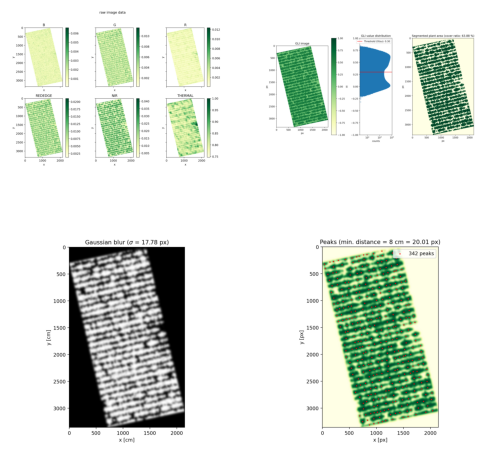

In [ ]:
plt.figure(figsize=(6,6))

paths = [
    "/content/plant_catalog/plant_cataloging_workflow-main/results/plant_detection/demo_2020-06-17_01_channels.png",
    "/content/plant_catalog/plant_cataloging_workflow-main/results/plant_detection/demo_2020-06-17_02_segmentation.png",
    "/content/plant_catalog/plant_cataloging_workflow-main/results/plant_detection/demo_2020-06-17_03_gauss_blur.png",
    "/content/plant_catalog/plant_cataloging_workflow-main/results/plant_detection/demo_2020-06-17_04_peaks.png"
]

for i, path in enumerate(paths):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(2,2, i+1)
    plt.imshow(image)
    plt.axis("off")

plant_groupingフォルダに生成された結果も見てみましょう

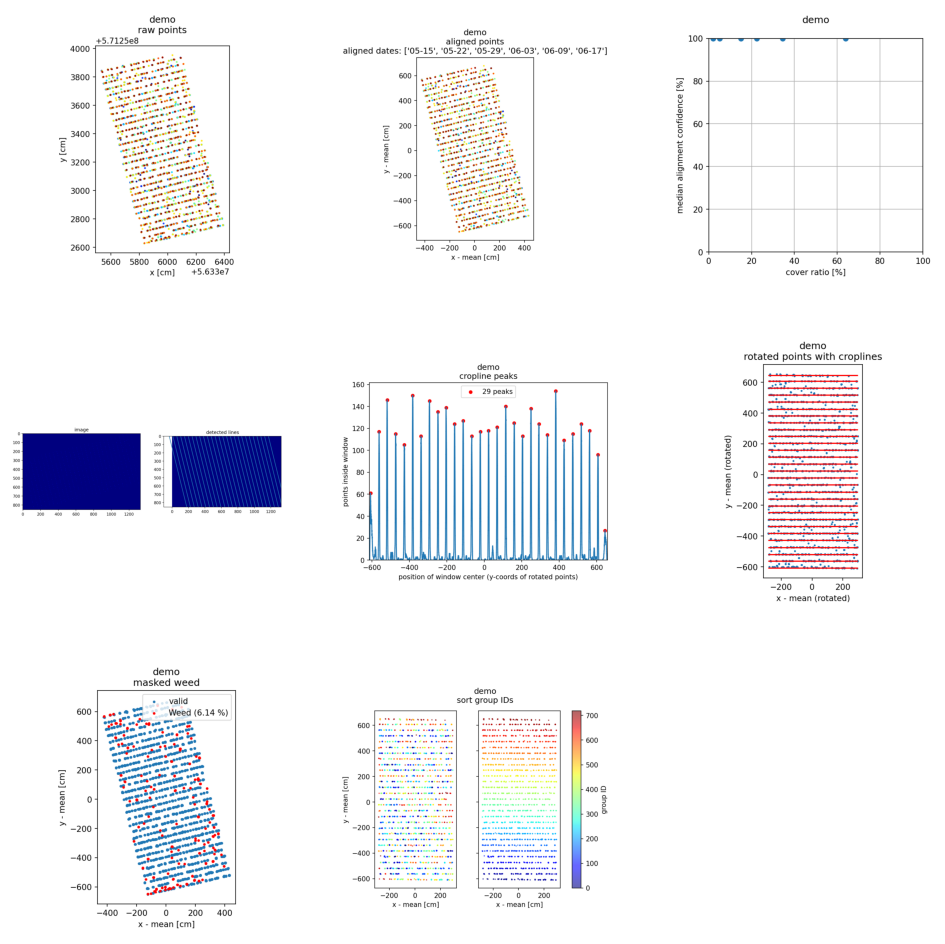

In [ ]:
plt.figure(figsize=(12,12))

RES_DIR = "/content/plant_catalog/plant_cataloging_workflow-main/results/plant_grouping"
for i, file in enumerate(sorted(os.listdir(RES_DIR))):
    path = os.path.join(RES_DIR, file)
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3, i+1)
    plt.imshow(image)
    plt.axis("off")

## Step-by-Step解説

In [50]:
# 前段落で変更したpwdをもとにもどす
%cd /content

import os

import matplotlib.pyplot as plt
import rasterio as rio
import numpy as np

from skimage.filters import gaussian, threshold_otsu
from skimage.feature import peak_local_max
from sklearn.neighbors import NearestNeighbors

from typing import Dict, List, Optional, Tuple, Union
from skimage.transform import hough_line, hough_line_peaks

from pycpd import RigidRegistration
import pyproj

# 公式レポジトリ由来
import cataloging.tasks

# cataloging.tasksで記述されているmpl.use('Agg')を上書きする
%matplotlib inline

/content



まずは一日分のみの解析を行います。

### データの可視化

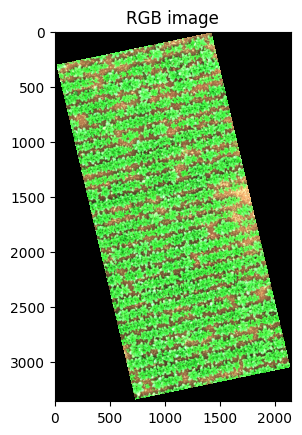

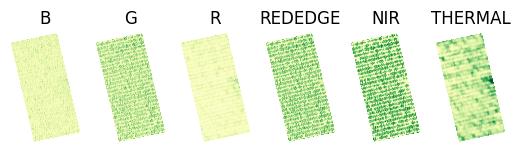

In [5]:
path = "/content/plant_catalog/leaf_spot_UAV_test/data/demo_20200617.tif"
image_channels = ["B", "G", "R", "REDEDGE", "NIR", "THERMAL"]

# float32ドローンデータの場合の読み込みと前処理
# 詳細はhttps://github.com/mrcgndr/plant_cataloging_workflow/blob/main/cataloging/tasks.pyのread_rasterを参照
# images = cataloging.tasks.read_raster(path, np.array(image_channels), image_channels)
raster = rio.open(path)
images = raster.read(fill_value=np.nan)
images /= np.nanmax(images)
images = images.transpose(1,2,0)

# RGB画像の表示。BGRを取得して、チャンネルを逆にしてRGBとしている
plt.title("RGB image")
plt.imshow(images[...,0:3][...,::-1]*255)
plt.show()

# チャンネルごとの表示
for i, name in enumerate(image_channels):
    plt.subplot(1,6,i+1)
    plt.imshow(images[...,i],cmap="YlGn")
    plt.title(name)
    plt.axis("off")

### 縮尺の計算

In [6]:
metadata = raster.meta
px_res = cataloging.tasks.calc_m_per_px(metadata)*100.
print(metadata)
print("cm/px:", px_res)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -32767.0, 'width': 2146, 'height': 3359, 'count': 6, 'crs': CRS.from_epsg(4326), 'transform': Affine(5.7679900000026594e-08, 0.0, 9.913949017379556,
       0.0, -3.595220000000034e-08, 51.56037607340009)}
cm/px: 0.3998301166575402


### Vegetation Indicesの計算

Vegetation Indices (VIs)を用いて土と植物の領域を分離します。RGチャンネルを使うNGRDI、RGBチャンネルを使うRGB、RとNIRチャンネルを使うOSAVIの３手法が公式レポのSegmentSoilPlantsに実装されています。なお、デフォルトではGLIが採用されています。

参考リンク：https://github.com/mrcgndr/plant_cataloging_workflow/blob/main/cataloging/tasks.py#L316

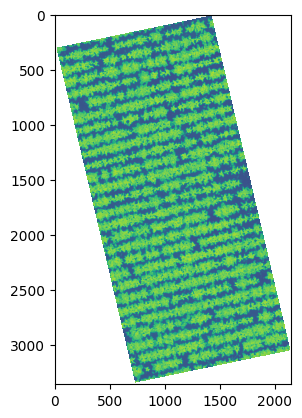

In [ ]:
# https://github.com/mrcgndr/plant_cataloging_workflow/blob/main/cataloging/vi.py
B, G, R = images[...,0], images[...,1], images[...,2]
vi_image = np.float16((2*G-R-B)/(2*G+R+B+1e-12))
plt.imshow(vi_image)

### Plant-Soil 領域分割
領域分割後に求められるcover ratio cは以下のように定義されています。
\begin{eqnarray*}
c = \frac{1}{N_{\text{px}}} \sum \limits _i^{N_{\text{px}}}\chi _{\lbrace v_{i} \ge \vartheta \rbrace}
\end{eqnarray*}

>

   "*where vi is the VI value for the ith of Npx total pixels and ϑ is a predefined threshold value. χ{ · } is the indicator function, which is 1 if the condition given in the index is met and 0 otherwise. Descriptively, the cover ratio is just the percentage of pixels above threshold.*" (Günder et al., 2022)

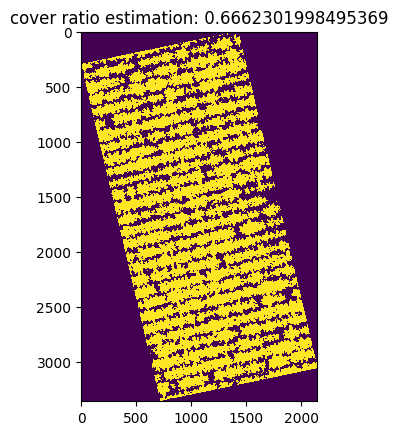

In [ ]:
# 閾値推定の前に、簡易的な植被率の計算を行い、生育段階を大まかに確認して、大津法を適用するか、99パーセンタイルを閾値にするか判断する。

est_thresh = 0.2  #　GLIの場合に使う簡易閾値
thresh_est_image = vi_image >= est_thresh
cover_ratio_est = np.nansum(thresh_est_image)/np.sum(np.isfinite(vi_image))

plt.title(f"cover ratio estimation: {cover_ratio_est}")
plt.imshow(thresh_est_image,interpolation="None")

# 植被率が0.75以上あると本提案手法では解析ができないことに注意
assert cover_ratio_est <0.75, "cover ratio is too high to calculate the latter process"

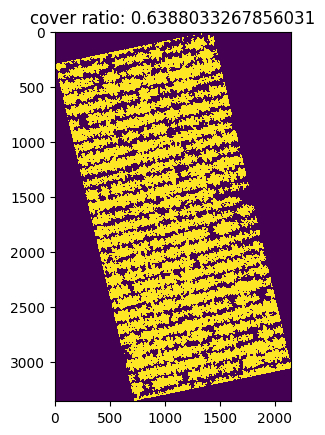

In [ ]:
# 閾値を求める
if cover_ratio_est < 0.01:
    thresh = np.percentile(vi_image[np.isfinite(vi_image)], 99)
else:
    thresh = threshold_otsu(vi_image[np.isfinite(vi_image)])

seg_mask = vi_image > thresh

cover_ratio = np.sum(seg_mask)/np.sum(np.isfinite(vi_image))

plt.title(f"cover ratio: {cover_ratio}")
plt.imshow(seg_mask, interpolation="None")

### 作物のピーク領域検出
https://github.com/mrcgndr/plant_cataloging_workflow/blob/main/cataloging/tasks.py#L594


In [ ]:
gauss_sigma_bounds = [2,10]  # cm
sigma = (gauss_sigma_bounds[0] + cover_ratio*np.diff(gauss_sigma_bounds)[0]) / px_res
print(sigma)

17.7836193874685


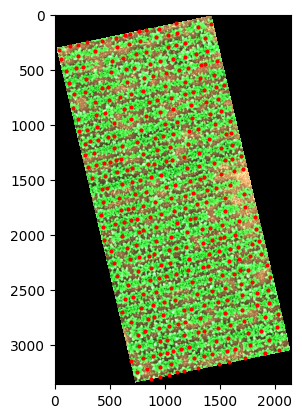

In [ ]:
min_peak_distance = 8  #cm
peak_threshold = 0.1

blurred = gaussian(seg_mask.astype(np.float32), sigma=sigma)
peaks = peak_local_max(blurred, min_distance=int(np.round(min_peak_distance/px_res)), threshold_abs=peak_threshold, exclude_border=False)
#表示用にrgb画像を作成する。
_image = images[...,0:3][...,::-1] *255.
plt.imshow(_image)
plt.scatter(peaks[:,1], peaks[:,0], s=4, c="red")

### 複数日に渡る画像データからの作物座標の抽出とアライメント

複数日のデータが必要となるため、これまでの手順を３日分データで繰り返し処理し、求めます。

In [7]:
max_centroid_distance_cpd = 9  # cm
max_centroid_distance_group = 12  # cm

In [17]:
# 前項の処理を関数化します。
def extract_peaks(path,):
    est_thresh = 0.2
    gauss_sigma_bounds = [2,10]  # cm
    min_peak_distance = 8  #cm
    peak_threshold = 0.1
    image_channels = ["B", "G", "R", "REDEDGE", "NIR", "THERMAL"]

    raster = rio.open(path)
    images = raster.read(fill_value=np.nan)
    images /= np.nanmax(images)
    images = images.transpose(1,2,0)

    metadata = raster.meta
    px_res = cataloging.tasks.calc_m_per_px(metadata)*100.
    B, G, R = images[...,0], images[...,1], images[...,2]
    vi_image = np.float16((2*G-R-B)/(2*G+R+B+1e-12))


    thresh_est_image = vi_image >= est_thresh
    cover_ratio_est = np.nansum(thresh_est_image)/np.sum(np.isfinite(vi_image))
    assert cover_ratio_est <0.75, "cover ratio is too high to calculate the latter process"

    if cover_ratio_est < 0.01:
        thresh = np.percentile(vi_image[np.isfinite(vi_image)], 99)
    else:
        thresh = threshold_otsu(vi_image[np.isfinite(vi_image)])
    seg_mask = vi_image > thresh
    cover_ratio = np.sum(seg_mask)/np.sum(np.isfinite(vi_image))

    sigma = (gauss_sigma_bounds[0] + cover_ratio*np.diff(gauss_sigma_bounds)[0]) / px_res
    blurred = gaussian(seg_mask.astype(np.float32), sigma=sigma)
    peaks = peak_local_max(blurred, min_distance=int(np.round(min_peak_distance/px_res)), threshold_abs=peak_threshold, exclude_border=False)
    # pixel coordinate to utm coordinate system
    utm_peaks, utm_transform = cataloging.tasks.px_to_utm(point_cloud=peaks, raster_meta=metadata)
    utm_peaks *= 100 # m * 100 = cm

    r = {}
    r["cover_ratio"] = cover_ratio
    r["pixel_resolution"] = px_res
    r["peaks"] = peaks
    r["utm_peaks"] = utm_peaks
    r["utm_transorm"] = utm_transform
    r["meta"] = metadata
    return r

In [34]:
paths = [
    "/content/plant_catalog/leaf_spot_UAV_test/data/demo_20200515.tif",
    "/content/plant_catalog/leaf_spot_UAV_test/data/demo_20200529.tif",
    "/content/plant_catalog/leaf_spot_UAV_test/data/demo_20200609.tif",
    "/content/plant_catalog/leaf_spot_UAV_test/data/demo_20200617.tif"
]

results = {}
results["perday"] = []
for path in paths:
    r = extract_peaks(path)
    r["filename"] = os.path.basename(path)
    results["perday"].append(r)

これで３日分の座標抽出ができました。１つの画像として描画してみましょう。

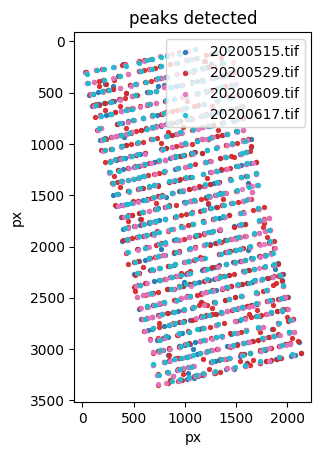

In [45]:
colors = plt.cm.tab10(np.linspace(0, 1, len(paths)))
labels = ([x.split("_")[-1] for x in paths])

plt.axes().set_aspect('equal')
plt.title("peaks detected")
for r, color, label in zip(results["perday"], colors, labels):
    peaks = r["peaks"]
    plt.scatter(peaks[:,1], peaks[:,0], color=color, label=label, alpha=0.9, s=8)

plt.xlabel("px")
plt.ylabel("px")
plt.gca().invert_yaxis()
plt.legend()

# 以後はコード簡略化のため、legendは省略します。

In [46]:
results["raw"] = {}

# peaks per date (layer)
points = np.array([x["utm_peaks"] for x in results["perday"]])
# aggregate to single array
point_cloud = np.vstack(points)  # pointcloud
# keep track of layer no. (date)
layers = np.repeat(np.arange(len(points)), np.array([len(p) for p in points]))


results["raw"]["point_cloud"] = point_cloud
results["raw"]["layers"] = layers

In [52]:
# align
results["raw"]["unique_layers"] = np.sort(np.unique(results["raw"]["layers"]))
n_layers = len(results["raw"]["unique_layers"])

# centralize point clouds
# calculate centroid of all points in UTM coordinates
results["raw"]["mean"] = results["raw"]["point_cloud"].mean(axis=0)
# apply on point cloud
P_c = results["raw"]["point_cloud"] - results["raw"]["mean"]

scaF = np.ones(n_layers)
rotA = np.zeros(n_layers)
traV = np.zeros((n_layers, 2))
median_conf = np.nan*np.ones(n_layers)

results["raw"]["aligned_points"] = P_c.copy()
P_centroid = P_c[layers == results["raw"]["unique_layers"][0]]
results["raw"]["aligned_points"][layers == results["raw"]["unique_layers"][0]] = P_centroid

for l in results["raw"]["unique_layers"]:
    if l == 0:
        continue
    X = P_centroid
    Y = P_c[layers == l]

    # filter points with no neighbours inside max_dist radius
    nnX = NearestNeighbors(n_neighbors=1, n_jobs=-1)
    nnY = NearestNeighbors(n_neighbors=1, n_jobs=-1)
    nnX.fit(X)
    nnY.fit(Y)
    distXY, _ = nnY.kneighbors(X)
    distYX, _ = nnX.kneighbors(Y)
    X_filt = X[(distXY <= max_centroid_distance_cpd).flatten()]
    Y_filt = Y[(distYX <= max_centroid_distance_cpd).flatten()]

    # Rigid Transformation: T(X) = s*R@X + t
    # s: scaling factor R: rotation matrix t: translation vector
    # A. Myronenko, X. Song: "Point Set Registration: Coherent Point Drift", https://arxiv.org/pdf/0905.2635.pdf

    reg = RigidRegistration(X=X_filt, Y=Y_filt) # X = target, Y = source
    _, T = reg.register()

    median_conf[l] = np.median(np.max(reg.P, axis=1))

    scaF[l] = T[0]
    rotA[l] = np.rad2deg(np.arccos(T[1][0,0]))
    traV[l] = T[2]
    results["raw"]["aligned_points"][layers == l] = cataloging.tasks.AlignPoints.transform(Y, T)
    _, P_centroid = cataloging.tasks.group_points(results["raw"]["aligned_points"][layers <= l],
                                    layers[layers <= l],
                                    max_dist=max_centroid_distance_group)


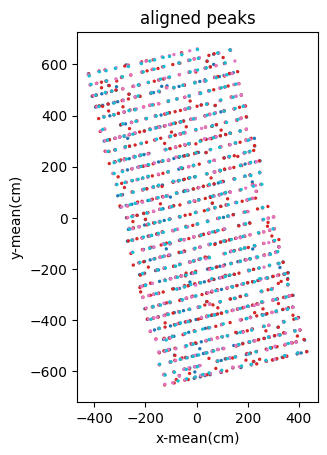

In [53]:
colors = plt.cm.tab10(np.linspace(0, 1, len(results)))  # Generate a color map
labels = ([x.split("_")[-1] for x in paths])

plt.axes().set_aspect('equal')
plt.title("aligned peaks")
plt.scatter(*results["raw"]["aligned_points"].T, s=2, c=layers, cmap="tab10")
plt.xlabel("x-mean(cm)")
plt.ylabel("y-mean(cm)")
plt.show()

### AlignCropLines

In [54]:
def findHoughAnglesNested(
            image: np.ndarray,
            i_max: int,
            steps: int,
            bin_tolerance: int
        ) -> Tuple[np.array, np.array, np.array, np.array, np.array]:
        test_angles = np.linspace(-np.pi/2, np.pi/2, steps, endpoint=False)
        mean, std = 0, np.pi/2
        for i in range(i_max):
            h, theta, d = hough_line(image, theta=test_angles)
            _, angles, dists = hough_line_peaks(h, theta, d)

            hist, bins = np.histogram(angles, bins=steps, range=(test_angles.min(), test_angles.max()))
            mean = np.mean(angles)
            std = np.std(angles, ddof=1)

            a_min = bins[np.max((0, np.argmax(hist)-bin_tolerance))]
            a_max = bins[np.min((steps, np.argmax(hist)+1+bin_tolerance))]
            test_angles = np.linspace(a_min, a_max, steps)

            if np.all(np.mean(angles) == angles):
                return (angles, dists, h, theta, d)
            else:
                pass
        return (angles, dists, h, theta, d)

In [55]:
res = 1  # cm/px
hough_img, _, _ = np.histogram2d(*results["raw"]["aligned_points"].T,
                                bins=[
                                    np.arange(results["raw"]["aligned_points"][:,0].min(), results["raw"]["aligned_points"][:,0].max(), res),
                                    np.arange(results["raw"]["aligned_points"][:,1].min(), results["raw"]["aligned_points"][:,1].max(), res)
                                    ])

In [63]:
i_max = 50
steps = 180
bin_tolerance = 2
angles, dists, h, theta, d = findHoughAnglesNested(hough_img, i_max, steps, bin_tolerance)
alpha_best = np.rad2deg(np.mean(angles))
alpha_best_std = np.rad2deg(np.std(angles, ddof=1))

# median cropline distance
results["rotated"]["median_cropline_distance"] = np.median(np.diff(np.sort(dists))) * res # px * (cm/px) = cm

results["rotated"]["point_cloud_rotated"] = (cataloging.tasks.AlignCroplines.rotation2d(alpha_best)@results["raw"]["aligned_points"].T).T


(854.0, 0.0)

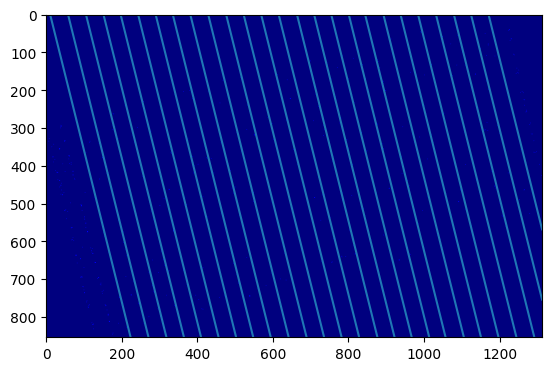

In [64]:
plt.axes().set_aspect('equal')
plt.imshow(hough_img,cmap="jet")
for angle, dist in zip(angles, dists):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    plt.axline((x0, y0), slope=np.tan(angle + np.pi/2))
plt.ylim([hough_img.shape[0],0])

### FindCropLines

In [61]:
from scipy.signal import find_peaks

scan_resolution = 10000 # steps per cropline

In [65]:
Y =results["raw"]["point_cloud_rotated"][:,1]
scan_window = results["raw"]["median_cropline_distance"] / 10
scan_precision = results["raw"]["median_cropline_distance"] / scan_resolution

In [66]:
y_test = np.arange(Y.min()-scan_window, Y.max()+scan_window, scan_precision)
incl_points_sum = []

for y_center in y_test:
    incl_points_sum.append(np.sum((Y >= y_center-(scan_window/2)) & (Y <= y_center+(scan_window/2))))
incl_points_sum = np.asarray(incl_points_sum)

peak_pos = find_peaks(incl_points_sum, distance=int(0.75*scan_resolution))[0]

croplines_ypos = y_test[peak_pos]

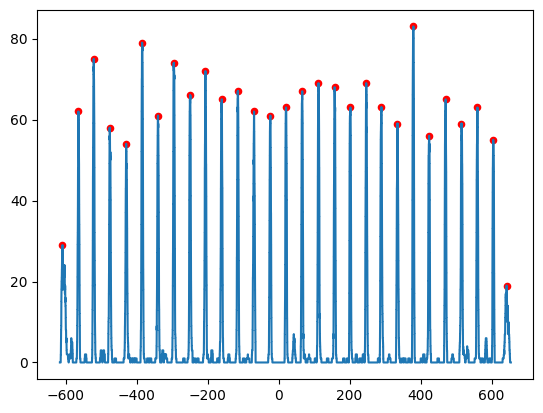

In [67]:
plt.plot(y_test, incl_points_sum)
plt.scatter(y_test[peak_pos], incl_points_sum[peak_pos],s=20, c="r")

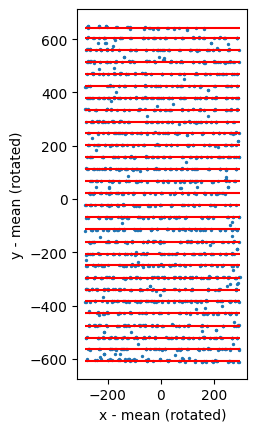

In [68]:
plt.axes().set_aspect('equal')
plt.scatter(*results["raw"]["point_cloud_rotated"].T, s=2, alpha=1, c="C0")
plt.hlines(croplines_ypos, xmin=results["raw"]["point_cloud_rotated"][:,0].min(), xmax=results["raw"]["point_cloud_rotated"][:,0].max(), color="r")
plt.xlabel('x - mean (rotated)')
plt.ylabel('y - mean (rotated)')
plt.show()

### 雑草除去

In [71]:
threshold_factor = 0.15

In [78]:
median_line_distance = np.median(np.diff(croplines_ypos))
next_line_distance = np.abs(results["raw"]["point_cloud_rotated"][:,1] - cataloging.tasks.FilterWeed.find_nearest(croplines_ypos, results["raw"]["point_cloud_rotated"][:,1]))

weedmask = next_line_distance <= threshold_factor*median_line_distance
weed_percentage = 100*np.sum(~weedmask)/len(results["raw"]["aligned_points"])

filtered = { "pointcloud_aligned":results["raw"]["aligned_points"][weedmask],
            "pointcloud_rotated":results["raw"]["aligned_points"][weedmask],
             "pointcloud": results["raw"]["point_cloud"][weedmask],
             "layers": layers[weedmask]}

results["filtered"] = filtered

### GroupPoints

In [73]:
max_centroid_distance = 9 # cm

In [75]:
labels, centroids = cataloging.tasks.group_points(filtered["pointcloud_aligned"], filtered["layers"], max_dist=max_centroid_distance)
labels_dist = np.bincount(np.bincount(labels[labels>=0]))[1:]

In [77]:
# filter discarded points
filtered["pointcloud_aligned"] = filtered["pointcloud_aligned"][labels>=0]
filtered["pointcloud_rotated"] = filtered["pointcloud_rotated"][labels>=0]
filtered["pointcloud"] = filtered["pointcloud"][labels>=0]
filtered["layers"] = filtered["layers"][labels>=0]
filtered["labels"] = labels[labels>=0]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553 in run_code        │
│                                                                                                  │
│   3551 │   │   │   │   │   await eval(code_obj, self.user_global_ns, self.user_ns)               │
│   3552 │   │   │   │   else:                                                                     │
│ ❱ 3553 │   │   │   │   │   exec(code_obj, self.user_global_ns, self.user_ns)                     │
│   3554 │   │   │   finally:                                                                      │
│   3555 │   │   │   │   # Reset our crash handler in place                                        │
│ in <cell line: 2>:2                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
IndexError: boolean index did not match indexed array along dimension 0; dimension is 1936 but corresponding 
boolean dimension is 1939

### SortGroupLabels

In [ ]:
labels_sorted = -1*np.ones_like(filtered["labels"])
group_centroids = np.array([cataloging.tasks.SortGroupLabels.centroid(filtered["pointcloud_rotated"][filtered["labels"] == l]) for l in range(filtered["labels"].max()+1)])
group_cropline_ids = cataloging.tasks.SortGroupLabels.find_nearest_index(croplines_ypos, group_centroids[:,1])
group_order = np.lexsort((group_centroids[:,0], group_cropline_ids))

for l_old, l_new in enumerate(group_order):
    labels_sorted[filtered["labels"] == l_new] = l_old

group_cropline_ids_sorted = group_cropline_ids[filtered["labels"]]
_, group_sizes = np.unique(labels_sorted, return_counts=True)

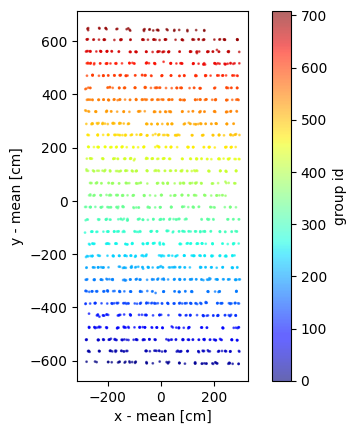

In [ ]:
plt.axes().set_aspect('equal')
plt.scatter(filtered["pointcloud_rotated"][:,0], filtered["pointcloud_rotated"][:,1], s=1, c=labels_sorted, alpha=0.6,cmap="jet")
plt.colorbar(label="group id")
plt.xlabel('x - mean [cm]')
plt.ylabel('y - mean [cm]')
plt.show()

### データフレームをつくる

In [ ]:
# こんなデータをつくりたい
import pandas as pd
import pickle

# load pickle
df = pd.read_pickle('/content/plant_catalog/plant_cataloging_workflow-main/results/plants/demo_plants.pkl')

In [ ]:
!cp -r /content/plant_catalog/plant_cataloging_workflow-main/results/ /content/drive/MyDrive/results

In [ ]:
df
# xy_pxとexport_shape、scale factorをつかって、rasterio.Windowで画像をソース画像からくり抜く
# export_shapeはconfig由来 128,128
# resolutionは0.2 cm/px

,field_id,date,group_id,group_size,group_cropline_id,xy_cm,xy_px,lonlat,xy_centered_aligned_cm,xy_centroid_centered_aligned_cm,y_cropline_rotated_cm,centroid_dist_cm,detected
0,demo,2020-05-07,0,1,0,"[56335834.8013925, 571252625.4093801]","[3353, 735]","(9.91399144213491, 51.560255502694766)","[-124.23152493948548, -650.7206746562034]","[-124.23152493948548, -650.7206746562034]",-607.364365,0.0,False
1,demo,2020-05-15,0,1,0,"[56335834.55698983, 571252626.2179475]","[3352, 734]","(9.913991408340161, 51.56025557566352)","[-124.23152493948548, -650.7206746562034]","[-124.23152493948548, -650.7206746562034]",-607.364365,0.0,False
2,demo,2020-05-22,0,1,0,"[56335836.95582087, 571252625.4302541]","[3353, 741]","(9.913991752922335, 51.56025550215109)","[-124.23152493948548, -650.7206746562034]","[-124.23152493948548, -650.7206746562034]",-607.364365,0.0,False
3,demo,2020-05-29,0,1,0,"[56335835.33129007, 571252626.780516]","[3350, 737]","[9.913991521037405, 51.5602556253713]","[-124.23152493948548, -650.7206746562034]","[-124.23152493948548, -650.7206746562034]",-607.364365,0.0,True
4,demo,2020-06-03,0,1,0,"[56335835.76544067, 571252626.1195346]","[3351, 737]","(9.913991582466961, 51.5602555654581)","[-124.23152493948548, -650.7206746562034]","[-124.23152493948548, -650.7206746562034]",-607.364365,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,demo,2020-07-01,719,1,28,"[56336032.859560564, 571253954.2151107]","[37, 1273]","(9.914022404665294, 51.56037474632738)","[73.82664312741765, 678.0850559195443]","[73.82664312741765, 678.0850559195443]",644.693135,0.0,False
9356,demo,2020-07-07,719,1,28,"[56336032.859560564, 571253954.2151107]","[36, 1272]","(9.914022404665294, 51.56037474632738)","[73.82664312741765, 678.0850559195443]","[73.82664312741765, 678.0850559195443]",644.693135,0.0,False
9357,demo,2020-07-14,719,1,28,"[56336032.859560564, 571253954.2151107]","[37, 1273]","(9.914022404665294, 51.56037474632738)","[73.82664312741765, 678.0850559195443]","[73.82664312741765, 678.0850559195443]",644.693135,0.0,False
9358,demo,2020-07-22,719,1,28,"[56336032.859560564, 571253954.2151107]","[36, 1273]","(9.914022404665294, 51.56037474632738)","[73.82664312741765, 678.0850559195443]","[73.82664312741765, 678.0850559195443]",644.693135,0.0,False


### 画像切り抜き